# Analyse Exploratoire du fichier myreport_swap_full.csv

### Imports (fichier & modules)

In [2]:
import pandas as pda
import matplotlib.pyplot as plt
import numpy as np
#import os
#print(os.getcwd())
#print(os.listdir('241016_LogETL'))

In [4]:
tab = pda.read_csv('../data/logServer/myreport_swap_full.csv', sep=',', dtype={'Program_Id': str, 'Schedules_Id': str, 'Schedules_Name': str})

### Le fichier 241016_LogETLError.csv

In [7]:
print("il y a ",tab.shape[0]," lignes et ",tab.shape[1]," colonnes dans le data frame")

il y a  2882  lignes et  8  colonnes dans le data frame


In [9]:
tab.columns

Index(['Date et heure', 'Date et heure(RAW)', 'Total', 'Total(RAW)',
       'Temps mort', 'Temps mort(RAW)', 'Couverture', 'Couverture(RAW)'],
      dtype='object')

In [11]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882 entries, 0 to 2881
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date et heure       2882 non-null   object 
 1   Date et heure(RAW)  2881 non-null   float64
 2   Total               2195 non-null   object 
 3   Total(RAW)          2194 non-null   float64
 4   Temps mort          2195 non-null   object 
 5   Temps mort(RAW)     2194 non-null   float64
 6   Couverture          2882 non-null   object 
 7   Couverture(RAW)     2881 non-null   float64
dtypes: float64(4), object(4)
memory usage: 180.3+ KB


In [13]:
# Calculer le nombre de valeurs uniques pour chaque colonne
nb_valeurs_uniques = tab.nunique()

# Afficher les résultats
print(nb_valeurs_uniques)

Date et heure         2882
Date et heure(RAW)    2881
Total                    7
Total(RAW)              28
Temps mort               1
Temps mort(RAW)          1
Couverture               3
Couverture(RAW)          2
dtype: int64


In [16]:
tab.head()


,Date et heure,Date et heure(RAW),Total,Total(RAW),Temps mort,Temps mort(RAW),Couverture,Couverture(RAW)
0,13/08/2024 00:00:00 - 01:00:00,45516.958333,NaN,NaN,NaN,NaN,0 %,0.0
1,13/08/2024 01:00:00 - 02:00:00,45517.000000,NaN,NaN,NaN,NaN,0 %,0.0
2,13/08/2024 02:00:00 - 03:00:00,45517.041667,3 %,3.0,0 %,0.0,100 %,10000.0
3,13/08/2024 03:00:00 - 04:00:00,45517.083333,3 %,3.0,0 %,0.0,100 %,10000.0
4,13/08/2024 04:00:00 - 05:00:00,45517.125000,3 %,3.0,0 %,0.0,100 %,10000.0


## Regardons le détail par colonne

### Analyse temporelle

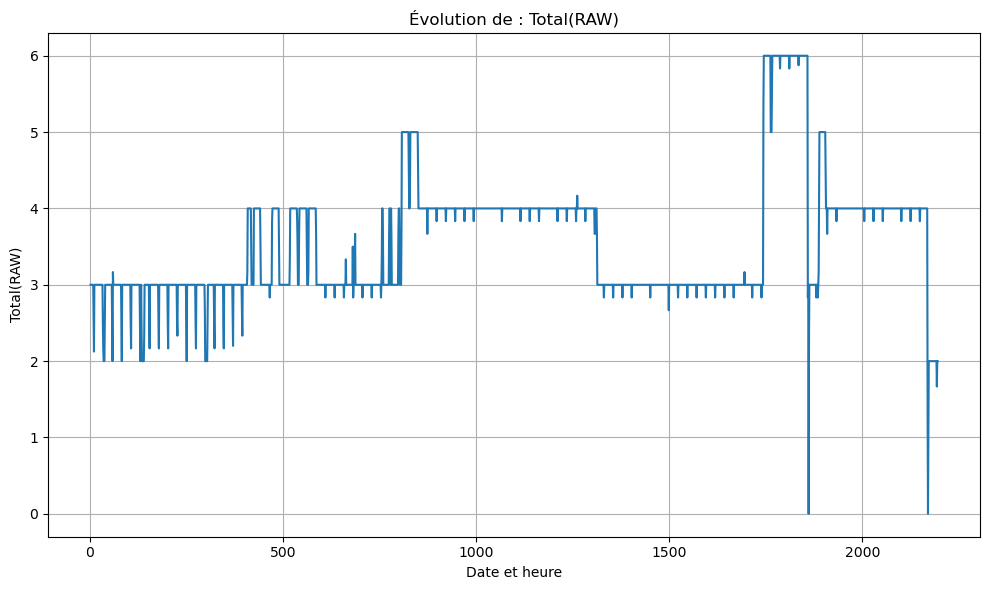

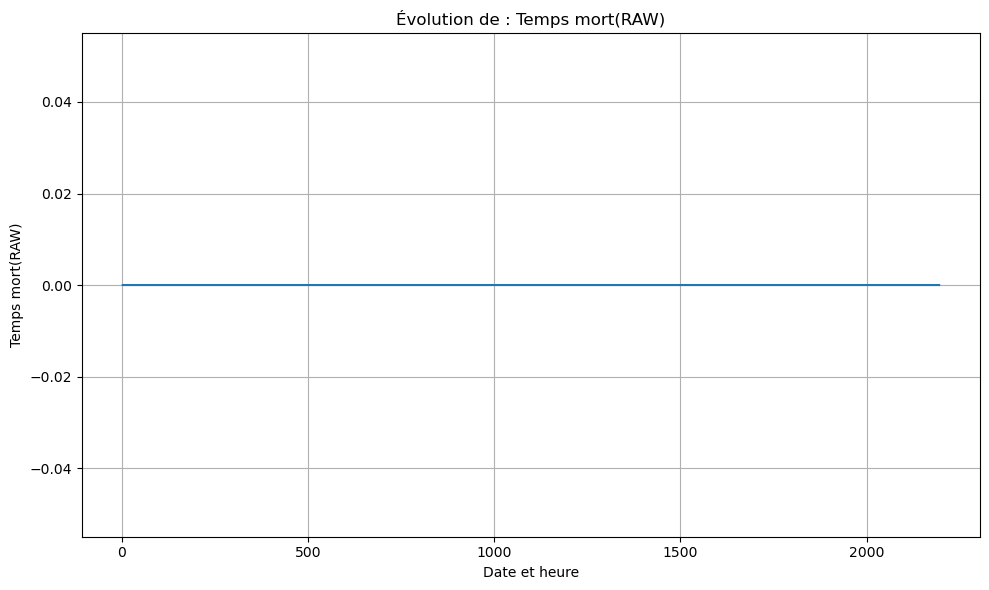

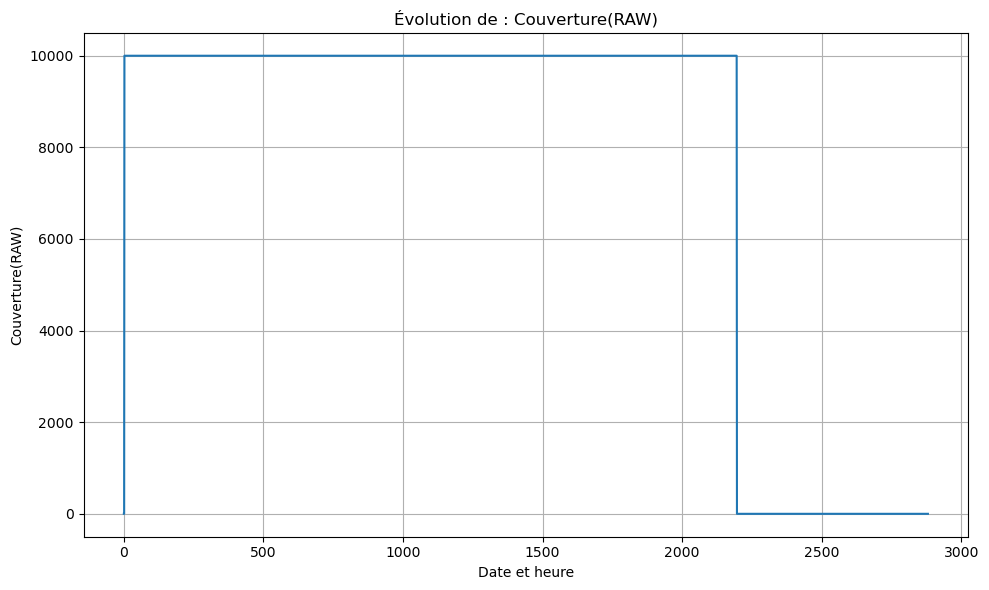

In [20]:
df=tab.copy()

# Boucle pour générer les graphiques
for col in df.columns:
    if col != 'Date et heure(RAW)' and "RAW" in col:  # Exclure la colonne 'Date et heure(RAW)'
        plt.figure(figsize=(10, 6))
        df[col].plot(kind='line', title=f'Évolution de : {col}')
        plt.xlabel('Date et heure')
        plt.ylabel(col)
        plt.grid(True)
        plt.tight_layout()
        plt.show()